# RememberIt Tutorial 🎓

Welcome! This interactive tutorial will show you how to create beautiful flashcards with:
- Styled text cards with gradient themes
- Syntax-highlighted code snippets
- Embedded images (from files or PIL)
- Integration with AI agents

Let's get started!

## Setup

First, install RememberIt (if you haven't already):

In [1]:
# Uncomment to install
# !pip install rememberit
# !uv pip install -e . # local dev

In [2]:
!uv pip install -e . # local dev

Resolved 16 packages in 4ms                                          
Prepared 1 package in 185ms                                              
Uninstalled 1 package in 0.59ms
Installed 1 package in 1ms(from file:///Users/madhavajay/dev
 ~ rememberit==0.1.10 (from file:///Users/madhavajay/dev/RememberIt)


In [3]:
import rememberit

💡 Run rememberit.tutorial() to learn how to use RememberIt


## 1. Create an AnkiWeb Account

If you don't have an AnkiWeb account yet:

In [5]:
# rememberit.tutorial()

## 2. Login

Once you have an account, login:

In [6]:
# Replace with your credentials
rememberit.login("email", "pass")

## 3. Sync and Get Your Decks

Sync with AnkiWeb to get your existing decks:

In [12]:
decks = rememberit.sync()
print(f"You have {len(decks)} deck(s)")

You have 3 deck(s)


In [13]:
decks

id,path,cards
1,Default,0
1764542098213,tinygrad,13
1764424896179,Tinygrad Basics,17


## 4. Create Your First Deck

Let's create a deck for Python basics:

In [14]:
# Create or get existing deck
deck = decks.get_or_create("Python Tutorial")
print(f"Deck: {deck.name}")
print(f"Cards: {len(deck.cards)}")

Deck: Python Tutorial
Cards: 0


## 5. Simple Cards

For styled cards with gradient backgrounds, use `upsert_deck()`:

In [15]:
card = deck.add_card(front="What is Python?", back="A high-level, interpreted programming language")

In [16]:
card

field,value
id,1764556097365
front,What is Python?
back,"A high-level, interpreted programming language"
deck,Python Tutorial


## 6. Upsert

Sometimes you don't want to get, create and update, you just want to that in one command.

This is perfect for asking an llm agent to add some cards for you, get them to make the card dict.

Make changes to it, and then upsert in one go.

In [17]:
# Add styled cards with upsert_deck
deck = rememberit.upsert_deck({
    "name": "Python Tutorial",
    "cards": [
        {
            "front": "What is a variable?",
            "front_type": "card",
            "front_theme": "blue",  # Custom theme
            "back": "A named storage location in memory"
        }
    ]
})
print("✓ Added styled cards!")

✓ Added styled cards!


In [18]:
deck

Deck(id=1764556096060, path='Python Tutorial', cards=2)

# 7. Add Code

You can add code either from code objects, or from strings and then choose a language for automatic syntax highlighting

In [19]:
# Method 1: Pass a function - source extracted automatically
def factorial(n):
    """Calculate factorial recursively."""
    if n <= 1:
        return 1
    return n * factorial(n - 1)

deck = rememberit.upsert_deck({
    "name": "Python Tutorial",
    "cards": [
        {
            "front": "Write a recursive factorial function",
            "back": factorial,  # Function object - source extracted!
            "tags": "python recursion"
        }
    ]
})

# Method 2: Plain text code with language specification
sql_query = """SELECT users.name, COUNT(orders.id) AS order_count
FROM users
LEFT JOIN orders ON users.id = orders.user_id
WHERE orders.created_at >= DATE_SUB(NOW(), INTERVAL 30 DAY)
GROUP BY users.id
HAVING order_count > 5
ORDER BY order_count DESC;"""

deck = rememberit.upsert_deck({
    "name": "Python Tutorial",
    "cards": [
        {
            "front": "Write a SQL query to find active users with 5+ orders in last 30 days",
            "back": sql_query,
            "back_type": "code",
            "back_lang": "sql",
            "tags": "sql database"
        }
    ]
})

print("✓ Added code cards with syntax highlighting!")

✓ Added code cards with syntax highlighting!


In [20]:
deck

Deck(id=1764556096060, path='Python Tutorial', cards=4)

# 8. LLM Text

Run this give a nice bit of text for you and your llm to read over for making quick updates.

In [21]:
rememberit.llmtxt()

Type,Description
(default),Styled card with random gradient
code,Syntax-highlighted code block
plain,"Plain text, no formatting"


In [22]:
# Add a code card
card = deck.add_card(
    front="Write a function to calculate factorial",
    back="""def factorial(n):
    if n <= 1:
        return 1
    return n * factorial(n-1)""",
    tags="python recursion",
    back_type="code",
    back_lang="python"
)

print("✓ Added code card with syntax highlighting!")

✓ Added code card with syntax highlighting!


In [23]:
card

field,value
id,1764556113133
front,Write a function to calculate factorial
back,def factorial(n): if n <= 1: return 1 return n * factorial(n-1)
deck,Python Tutorial


## 9. Add Images

Images are **automatically detected and embedded**!

You can use:
- File paths (relative, absolute, or with `~`)
- PIL Images  
- Matplotlib figures
- Any object with `_repr_png_()` or `_repr_jpeg_()`

**Note:** The tutorial includes `pickles.jpg` - our mascot!

In [24]:
# Download the pickles.jpg image (RememberIt mascot)
!curl -o pickles.jpg https://raw.githubusercontent.com/madhavajay/RememberIt/main/src/rememberit/image/pickles.jpg
!ls | grep pickles.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 64703  100 64703    0     0   243k      0 --:--:-- --:--:-- --:--:--  243k
pickles.jpg


In [25]:
# Example 1: From file path
deck = rememberit.upsert_deck({
    "name": "Python Tutorial",
    "cards": [
        {
            "front": "Who is the RememberIt mascot?",
            "back": "pickles.jpg"  # Auto-detected and embedded!
        }
    ]
})
print("✓ Added image card!")

✓ Added image card!


Deck(id=1764556096060, path='Python Tutorial', cards=6)
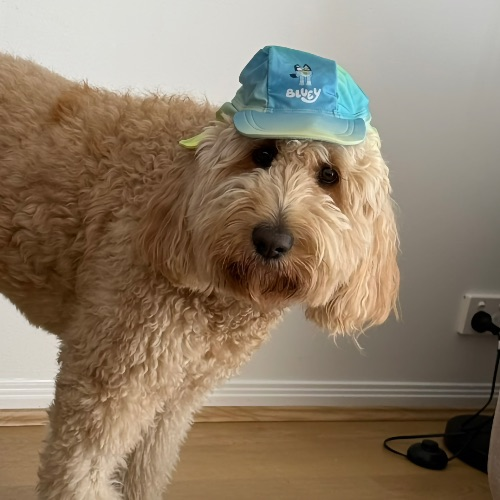

In [26]:
deck

In [27]:
deck_data = {
    "name": "Python Tutorial",
    "cards": [
        # Simple text card
        {
            "front": "What is a list?",
            "back": "An ordered, mutable collection of items"
        },
        
        # Code card (auto-detected)
        {
            "front": "Create a list",
            "back": "my_list = [1, 2, 3, 4]",
            "back_type": "code",
            "back_lang": "python"
        },
        
        # Styled question card
        {
            "front": "What is a dictionary?",
            "front_type": "card",
            "front_theme": "blue",
            "back": "A collection of key-value pairs"
        },
    ]
}

rememberit.upsert_deck(deck_data)
print("✓ Added 3 cards!")

✓ Added 3 cards!


In [28]:
# Example 2: From PIL Image
from PIL import Image, ImageDraw

# Create a simple image with text
img = Image.new('RGB', (400, 200), color='#3498db')
draw = ImageDraw.Draw(img)
draw.text((20, 80), "Hello from PIL!", fill='white')

rememberit.upsert_deck({
    "name": "Python Tutorial",
    "cards": [
        {
            "front": "What is PIL?",
            "back": img  # PIL Image - auto-converted!
        }
    ]
})
print("✓ Added PIL image card!")

✓ Added PIL image card!


# 10. Easy indexing

Deck(id=1764556096060, path='Python Tutorial', cards=10)
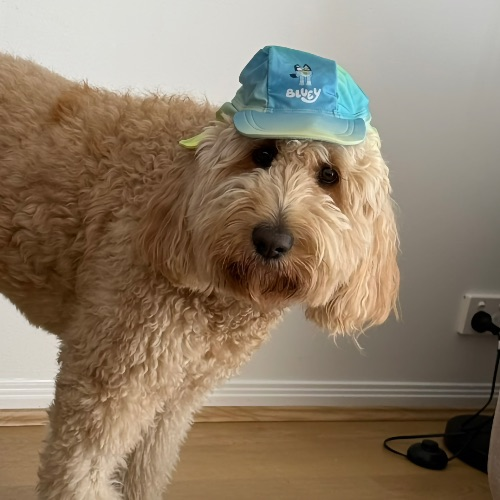
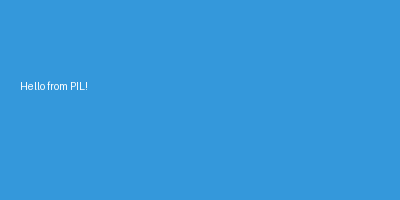

In [29]:
deck = rememberit.decks["Python Tutorial"]
deck

In [30]:
# Get a card by index or search
card = deck.cards[0]  # First card

In [31]:
card

field,value
id,1764556097365
front,What is Python?
back,"A high-level, interpreted programming language"
deck,Python Tutorial


In [32]:
# or
card = deck.cards["mascot"]  # Fuzzy search by front text

field,value
id,1764556113654
front,Who is the RememberIt mascot?
back,
deck,Python Tutorial

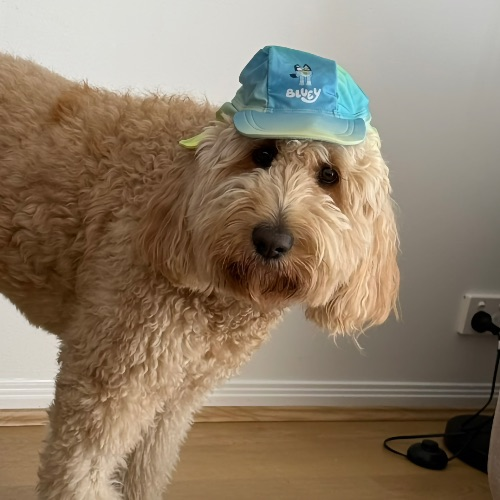

In [33]:
card

In [34]:
# Update it
card.update(front="What does Pickles look like?", )
print("✓ Card updated!")

✓ Card updated!


field,value
id,1764556113654
front,What does Pickles look like?
back,
deck,Python Tutorial

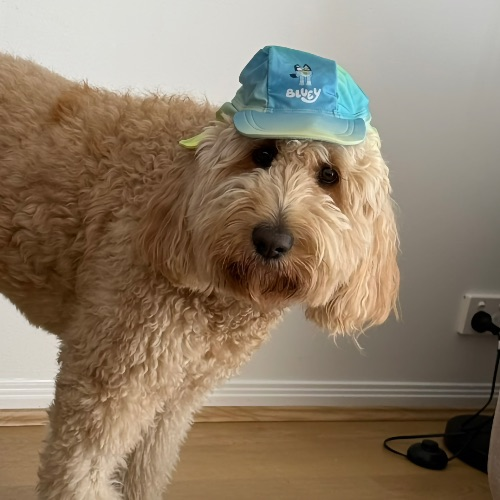

In [35]:
card

## 11. Update Existing Cards

You can update cards using the card object:

In [36]:
# Refresh to see all our new cards
deck = rememberit.decks["Python Tutorial"]

# Update the first card
card = deck.cards[0]
card.update(back="A powerful Python library for beautiful Anki flashcards with code, images, and more!")
print(f"✓ Updated card: {card.front[:50]}...")

✓ Updated card: <div data-ri-type="card" data-ri-theme="orange"><d...


## 12. Export Your Deck

Export your deck to JSON for backup or AI processing:

**Note:** Images are embedded as base64 data URIs in the HTML.

# Get clean format (parsed from HTML)

In [37]:
data = deck.to_dict()
print(f"Deck: {data['name']}")
print(f"Cards: {len(data['cards'])}")
print(f"\nFirst card preview:")
print(f"  Front: {data['cards'][0]['front'][:60]}...")
print(f"  Back: {data['cards'][0]['back'][:60]}...")

Deck: Python Tutorial
Cards: 10

First card preview:
  Front: What is Python?...
  Back: A powerful Python library for beautiful Anki flashcards with...


In [38]:
# Or get raw HTML (includes embedded base64 images)
raw_data = deck.to_dict(raw=True)
print("Note: Images are embedded as base64 data URIs in the HTML")

Note: Images are embedded as base64 data URIs in the HTML


## 13. Using with AI Agents (Solve.it, etc.)

RememberIt is designed to work seamlessly with AI agents!

In [Solve.it](https://solve.it.com/?via_id=eil03t43&utm_source=rememberit) you can call:
```
rememberit.load_tools()
```

In [39]:
rememberit.load_tools()

{'solveit': False,
 'registered': False,
 'tools': ['rememberit_list_decks',
  'rememberit_list_card_types',
  'rememberit_get_deck',
  'rememberit_deck_as_dict',
  'rememberit_upsert_deck',
  'rememberit_add_card',
  'rememberit_add_code_card',
  'rememberit_add_cards',
  'rememberit_update_card',
  'rememberit_create_deck',
  'rememberit_delete_deck',
  'rememberit_sync_anki',
  'rememberit_show_help',
  'rememberit_show_llmtxt',
  'rememberit_show_examples']}

In [40]:
# Delete a deck (be careful!)
# deck.delete()

## Next Steps

1. **Open Anki** and review your cards!
2. **Try different themes** and card types
3. **Integrate with your workflow** - create cards as you learn
4. **Use with AI agents** like Solve.it to automate flashcard creation

## Resources

- [GitHub Repository](https://github.com/madhavajay/rememberit)
- [AnkiWeb](https://ankiweb.net)
- [Solve.it](https://solve.it.com/?via_id=eil03t43&utm_source=rememberit)

Happy learning! 🎉

In [41]:
rememberit.help()

Function,Description
"login(email, password)",Authenticate and save sync key
logout(),Clear saved credentials
sync(),"Sync with AnkiWeb, return decks"
decks(),Return cached decks
create_deck(name),Create a new deck
delete_deck(deck),Delete by name/id/object
"rename_deck(deck, new_name)",Rename a deck
upsert_deck(data),Add/update cards from dict/JSON
Function,Description
"format_code(code, lang)",Format code with syntax highlighting
